In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json

import warnings
warnings.filterwarnings('ignore')

## Loading the data path

In [2]:
with open(r"E:\Learning\TEAI Cup\Data\Parquet Data\latest_data.json", 'r') as f:
    latest_data = json.load(f)
    d1_path = latest_data['d1']
    d2_path = latest_data['d2']
    d3_path = latest_data['d3']

## Loading the actual data using data paths

In [3]:
d1 = pd.read_parquet(d1_path)
d2 = pd.read_parquet(d2_path)
d3 = pd.read_parquet(d3_path)

In [4]:
d1

,machine_id,machine_event_start_timestamp,machine_event_start_end_timestamp,part_number,tool_number
0,S-223,2025-12-05 08:16:53,2025-12-05 08:33:10,5-963715-1,S0275910
1,S-223,2025-12-05 08:33:17,2025-12-05 08:33:54,5-963715-1,S0275910
2,S-276,2025-12-05 08:33:52,2025-12-05 08:52:30,7-1452668-3,S1829585
3,S-223,2025-12-05 08:33:55,2025-12-05 09:51:14,5-963715-1,S0275910
4,S-226,2025-12-05 08:35:08,2025-12-05 09:19:37,5-965906-1,S0025195
...,...,...,...,...,...
1483,S-276,2025-12-10 05:43:39,2025-12-10 05:52:53,(null),(null)
1484,S-276,2025-12-10 05:54:30,2025-12-10 05:55:45,(null),(null)
1485,S-268,2025-12-10 06:00:00,2025-12-10 06:05:06,(null),(null)
1486,S-223,2025-12-10 06:00:00,2025-12-10 06:03:58,(null),(null)


In [5]:
d2

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue
0,S-226,stpStepFrIda,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",2025-12-05 08:15:13,-0.10,0.10,1.00
1,S-226,teil2Wire,"1.9513,1.9592,1.9489,1.9397,1.962,1.9648,1.944...",2025-12-05 08:15:13,-0.20,0.20,2.00
2,S-226,teil2Iso,"3.4863,3.4962,3.4957,3.4841,3.4901,3.4888,3.48...",2025-12-05 08:15:13,-0.20,0.20,3.50
3,S-226,iTeil2IsostempelDef,"49.1378,48.7538,48.448,48.9035,48.923,48.8579,...",2025-12-05 08:15:13,-10.00,10.00,50.00
4,S-226,folgefehlerTeil12,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2025-12-05 08:15:13,0.00,10.00,0.00
...,...,...,...,...,...,...,...
2272467,S-226,teil2GapX,"0.4968,0.4947,0.5017,0.4991,0.5023,0.5029,0.50...",2025-12-10 06:05:06,-0.06,0.00,0.53
2272468,S-226,teil2GapY,"0.4975,0.4852,0.4824,0.4824,0.4941,0.4863,0.48...",2025-12-10 06:05:06,-0.06,0.00,0.53
2272469,S-226,prfungTeil1KastenSpk,"1.8906,1.8895,1.8887,1.8898,1.882,1.8869,1.880...",2025-12-10 06:05:06,0.00,0.35,1.60
2272470,S-226,iTeil1Rastfederdifferenz,"0.0034,0.0032,0.0033,0.0006,0.0056,0.0023,0.00...",2025-12-10 06:05:06,-0.08,0.08,0.00


In [6]:
d3

,machine_id,machine_status_active_code,timestamp,part_number,error_variable,curr,ltl,utl
915,S-226,200,2025-12-05 08:34:54,5-965906-1,Teil 2 Gap Y,0.530,0.470,0.530
916,S-276,200,2025-12-05 08:36:09,7-1452668-3,SP 1 durchgebrannt GW 70,55.676,0.000,45.000
917,S-276,200,2025-12-05 08:37:10,7-1452668-3,I-Kasten hinten,1.884,1.780,1.880
918,S-276,200,2025-12-05 08:37:11,7-1452668-3,I-Kasten SP2,1.888,1.780,1.880
919,S-276,200,2025-12-05 08:38:30,7-1452668-3,SP 1 durchgebrannt GW 70,46.847,0.000,45.000
...,...,...,...,...,...,...,...,...
6482,S-276,200,2025-12-09 20:59:37,7-1452668-3,SP 1 durchgebrannt GW 70,52.973,0.000,45.000
6483,S-223,200,2025-12-09 21:00:19,5-963715-1,Teil 2 Bodylötstelle,0.000,0.900,2.000
6484,S-223,200,2025-12-09 21:00:19,5-963715-1,Teil 2 Bodylötstelle,0.000,0.900,2.000
6485,S-223,200,2025-12-09 21:00:19,5-963715-1,Teil 2 Gap Y,0.464,0.465,0.535


In [7]:
# Combining Way
# Machine code from d1 match with d2
# Timestamp bn start and end of d1 in d2 group them
# For simplification lets make a combined dataset for S-223

# Lets try matching all 3 datas using Timestamp, Machine Id

In [29]:
sample = d1.sample()
machine_id = sample.machine_id.values[0]
start_time = pd.to_datetime(sample.machine_event_start_timestamp.values[0])
end_time = pd.to_datetime(sample.machine_event_start_end_timestamp.values[0])
part_number = sample.part_number.values[0]
tool_number = sample.tool_number.values[0]

print(f"Machine ID: {machine_id} \nStart Time: {start_time} \nEnd Time: {end_time} \nPart Number: {part_number} \nTool Number: {tool_number}")

Machine ID: S-268 
Start Time: 2025-12-08 13:21:52 
End Time: 2025-12-08 13:22:23 
Part Number: 2-1703930-2 
Tool Number: S1829661


In [30]:
small_d2 = d2[(d2.timestamp >= start_time) & (d2.timestamp <= end_time) & (d2.machine_id == machine_id)]
small_d2

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue
1065178,S-268,spur1Gap,"0.177,0.177,0.176,0.178,0.184,0.18,0.178,0.18,...",2025-12-08 13:22:09,-0.034,0.03,0.19
1065179,S-268,spur1IKastenMitte,"0.997,0.993,0.996,0.998,1.006,0.997,0.999,0.99...",2025-12-08 13:22:09,0.000,0.20,0.90
1065180,S-268,spur1IKastenHinten,"0.994,0.992,0.991,0.993,0.993,0.995,0.99,0.988...",2025-12-08 13:22:09,0.000,0.11,0.95
1065181,S-268,spur1Wire,"1.728,1.725,1.727,1.729,1.727,1.728,1.728,1.72...",2025-12-08 13:22:09,-0.100,0.10,1.70
1065182,S-268,spur1Iso,"1.941,1.941,1.941,1.942,1.941,1.943,1.942,1.94...",2025-12-08 13:22:09,-0.100,0.10,1.90
1065183,S-268,spur1DeformFeder,"63.988,61.29,67.703,64.566,57.739,67.151,65.08...",2025-12-08 13:22:09,-25.000,25.00,50.00
1065184,S-268,spur2IKastenVorne,"1.013,1.004,1.003,1.024,1.003,0.991,0.996,1.00...",2025-12-08 13:22:09,0.000,0.11,0.95
1065185,S-268,spur1IKastenVorne,"0.998,0.999,1,1.001,0.997,0.999,0.998,0.998,0....",2025-12-08 13:22:09,0.000,0.11,0.95
1065186,S-268,spur2IKastenMitte,"0.996,0.992,0.99,1.013,0.989,0.977,0.997,0.989...",2025-12-08 13:22:09,0.000,0.18,0.92
1065187,S-268,spur2Wire,"1.709,1.708,1.71,1.707,1.709,1.706,1.709,1.707...",2025-12-08 13:22:09,-0.100,0.10,1.70


In [31]:
# Lets check if there is errors in this and present in the final dataset d3
d3[(d3.timestamp >= start_time) & (d3.timestamp <= end_time) & (d3.machine_id == machine_id) & (d3.part_number == part_number)]

,machine_id,machine_status_active_code,timestamp,part_number,error_variable,curr,ltl,utl
3542,S-268,200,2025-12-08 13:22:10,2-1703930-2,Spur 2 Iso,2.116,1.8,2.0


In [17]:
lt = [.5098,0.5105,0.5096,0.5101,0.5051,0.5105,0.501,0.5138,0.5101,0.509,0.5098,0.5187,0.5066,0.511,0.5175,0.5106,0.5018,0.5088,0.5144,0.5141,0.5054,0.5003,0.5121,0.5182,0.5195,0.5241,0.5128,0.5128,0.5101,0.5173,0.5178,0.5114,0.5063,0.5144,0.5145,0.5069,0.5102,0.5104,0.5156,0.5159,0.5113,0.51,0.5127,0.5071,0.5109,0.504,0.5162,0.5091,0.5151,0.5123,0.5063,0.5112,0.5124,0.5047,0.5144,0.5137,0.5094,0.5203,0.5184,0.5078,0.518,0.516,0.5211,0.5066,0.5082,0.5133,0.5116,0.511,0.51,0.5114,0.5074,0.5175,0.5037,0.4952,0.5098,0.4999,0.5052,0.5083,0.5174,0.5213,0.5137,0.5191,0.504,0.5075,0.5111,0.5097,0.5076,0.5114,0.5115,0.517,0.5175,0.5002,0.5039,0.5053,0.5125,0.5119,0.5089,0.5064,0.5055,0.5077]

print(len(lt))

flag = not all(x <= 0.53 for x in lt)
flag

100


False

In [12]:
def average_of_value(x):
    nums = list(map(float, x.split(",")))
    return np.mean(nums)

In [13]:
small_d2['average_value'] = small_d2['value'].apply(average_of_value)
small_d2

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue,average_value
448865,S-269,spur2IKastenHinten,"0.984,0.98,0.979,0.981,0.978,0.979,0.982,0.985...",2025-12-06 11:40:15,0.0,0.11,0.95,0.98197
448866,S-269,spur1IKastenVorne,"1,0.989,0.993,0.995,0.994,0.989,0.992,0.991,0....",2025-12-06 11:40:15,0.0,0.11,0.95,0.99011
448867,S-269,spur1IKastenMitte,"1.005,0.995,0.999,1.001,0.993,0.995,1,0.997,0....",2025-12-06 11:40:15,0.0,0.20,0.90,0.99658
448868,S-269,spur1IKastenHinten,"0.975,0.982,0.975,0.979,0.975,0.976,0.983,0.97...",2025-12-06 11:40:15,0.0,0.11,0.95,0.97925
448869,S-269,spur1Wire,"1.727,1.727,1.723,1.725,1.727,1.729,1.728,1.72...",2025-12-06 11:40:15,-0.1,0.10,1.70,1.72431
...,...,...,...,...,...,...,...,...
448930,S-269,spur2DeformationFeder,"60.102,61.509,60.516,60.051,60.607,61.662,59.9...",2025-12-06 11:40:47,-25.0,25.00,50.00,60.19680
448931,S-269,spur1IKastenHinten,"0.979,0.981,0.986,0.985,0.987,0.981,0.982,0.97...",2025-12-06 11:40:47,0.0,0.11,0.95,0.98077
448932,S-269,spur1IKastenMitte,"1,1.005,1,1.011,1.012,1.004,1.001,1,0.995,0.99...",2025-12-06 11:40:47,0.0,0.20,0.90,0.99967
448933,S-269,spur1IKastenVorne,"0.992,0.998,0.996,1,1.003,0.996,0.993,0.995,0....",2025-12-06 11:40:47,0.0,0.11,0.95,0.99271


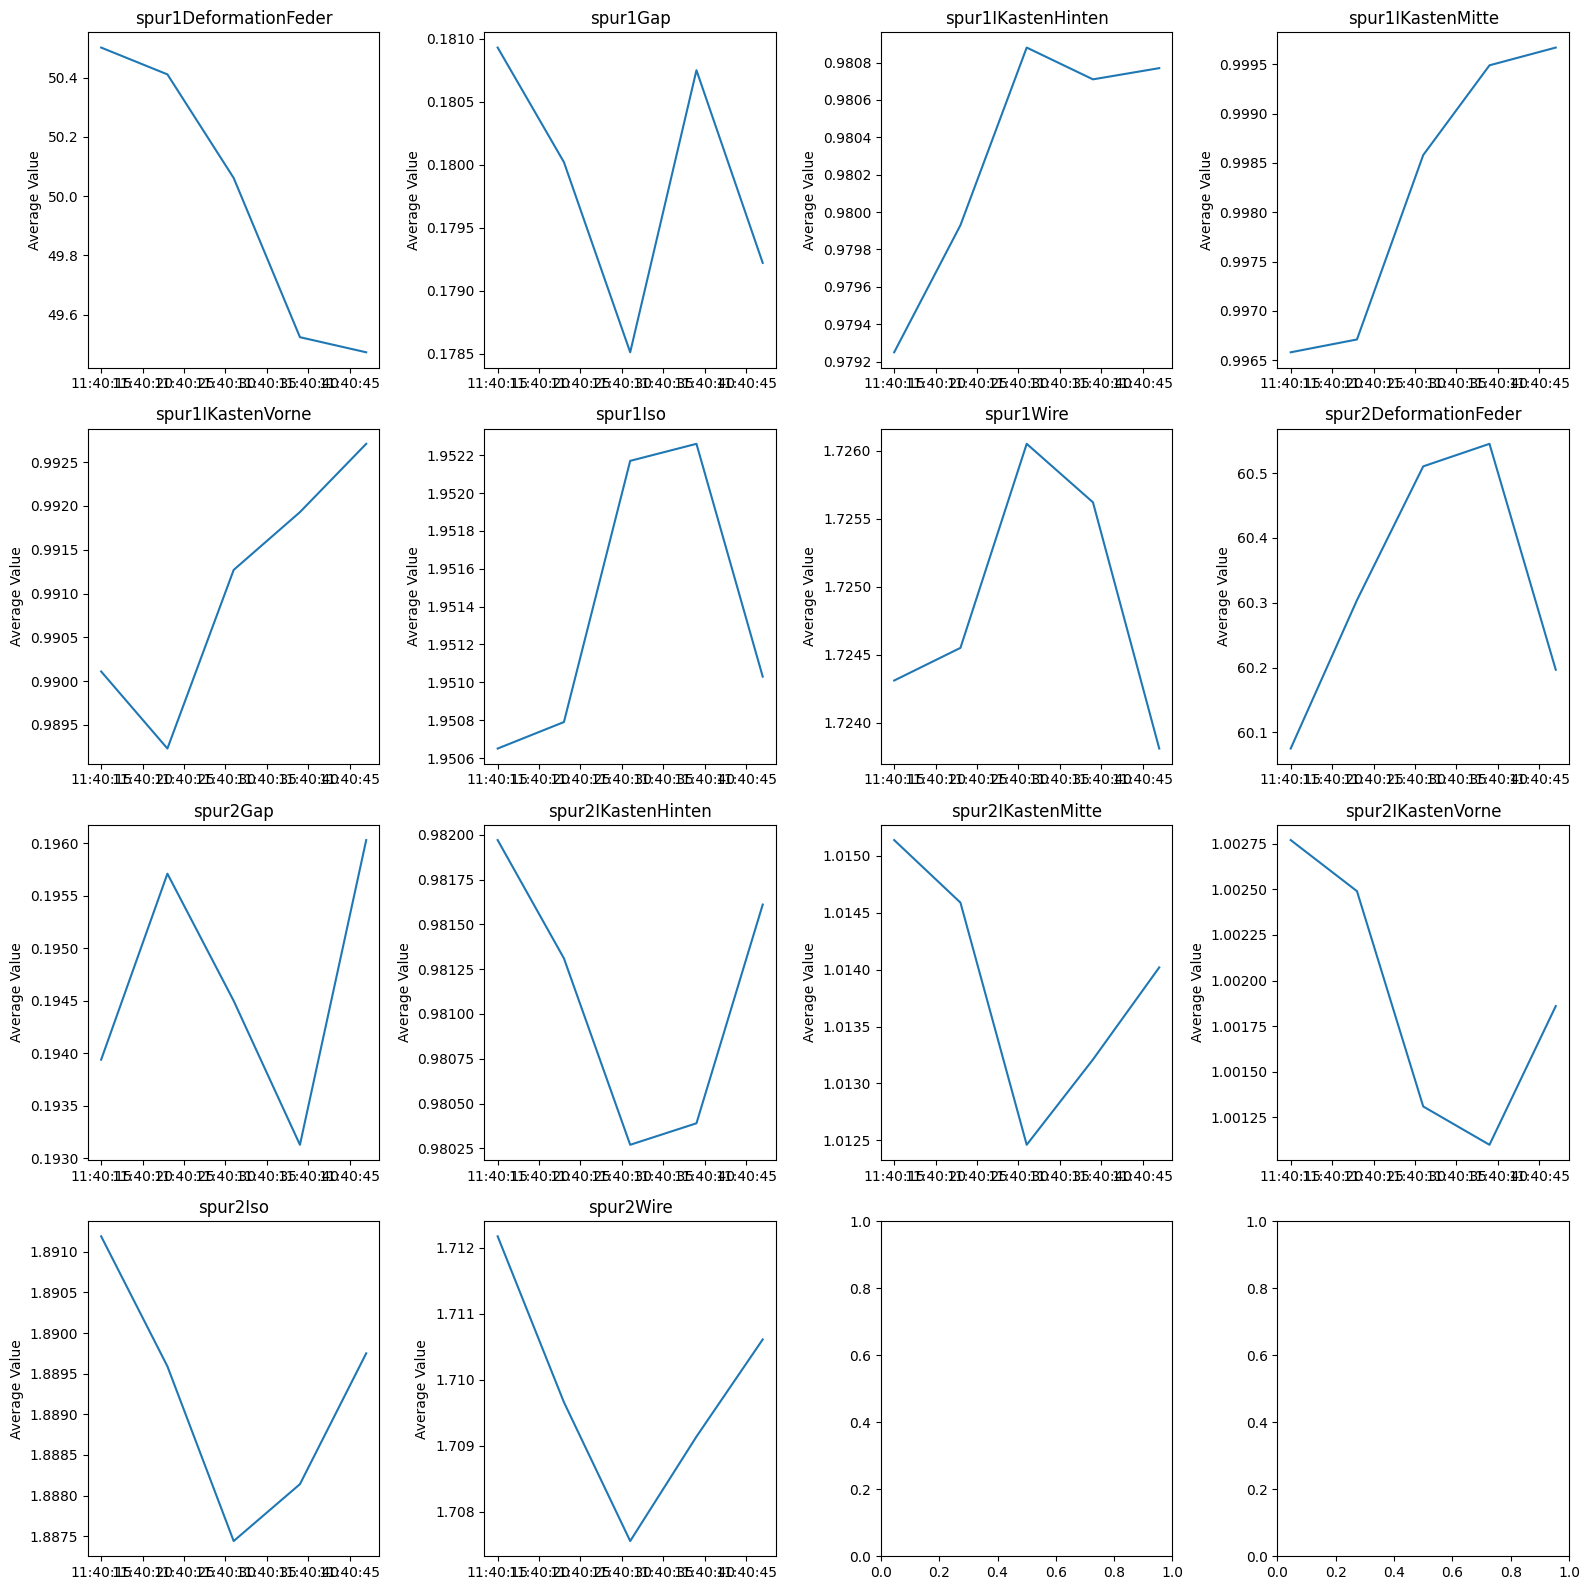

In [14]:
# Total Variables
total_vars = sorted(small_d2.variable_name.unique().tolist())

n = len(total_vars)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for i, var in enumerate(total_vars):
    temp = small_d2[small_d2["variable_name"] == var]
    axes[i].plot(temp["timestamp"], temp["average_value"])
    axes[i].set_title(var)
    axes[i].set_ylabel("Average Value")


plt.tight_layout()
plt.show()

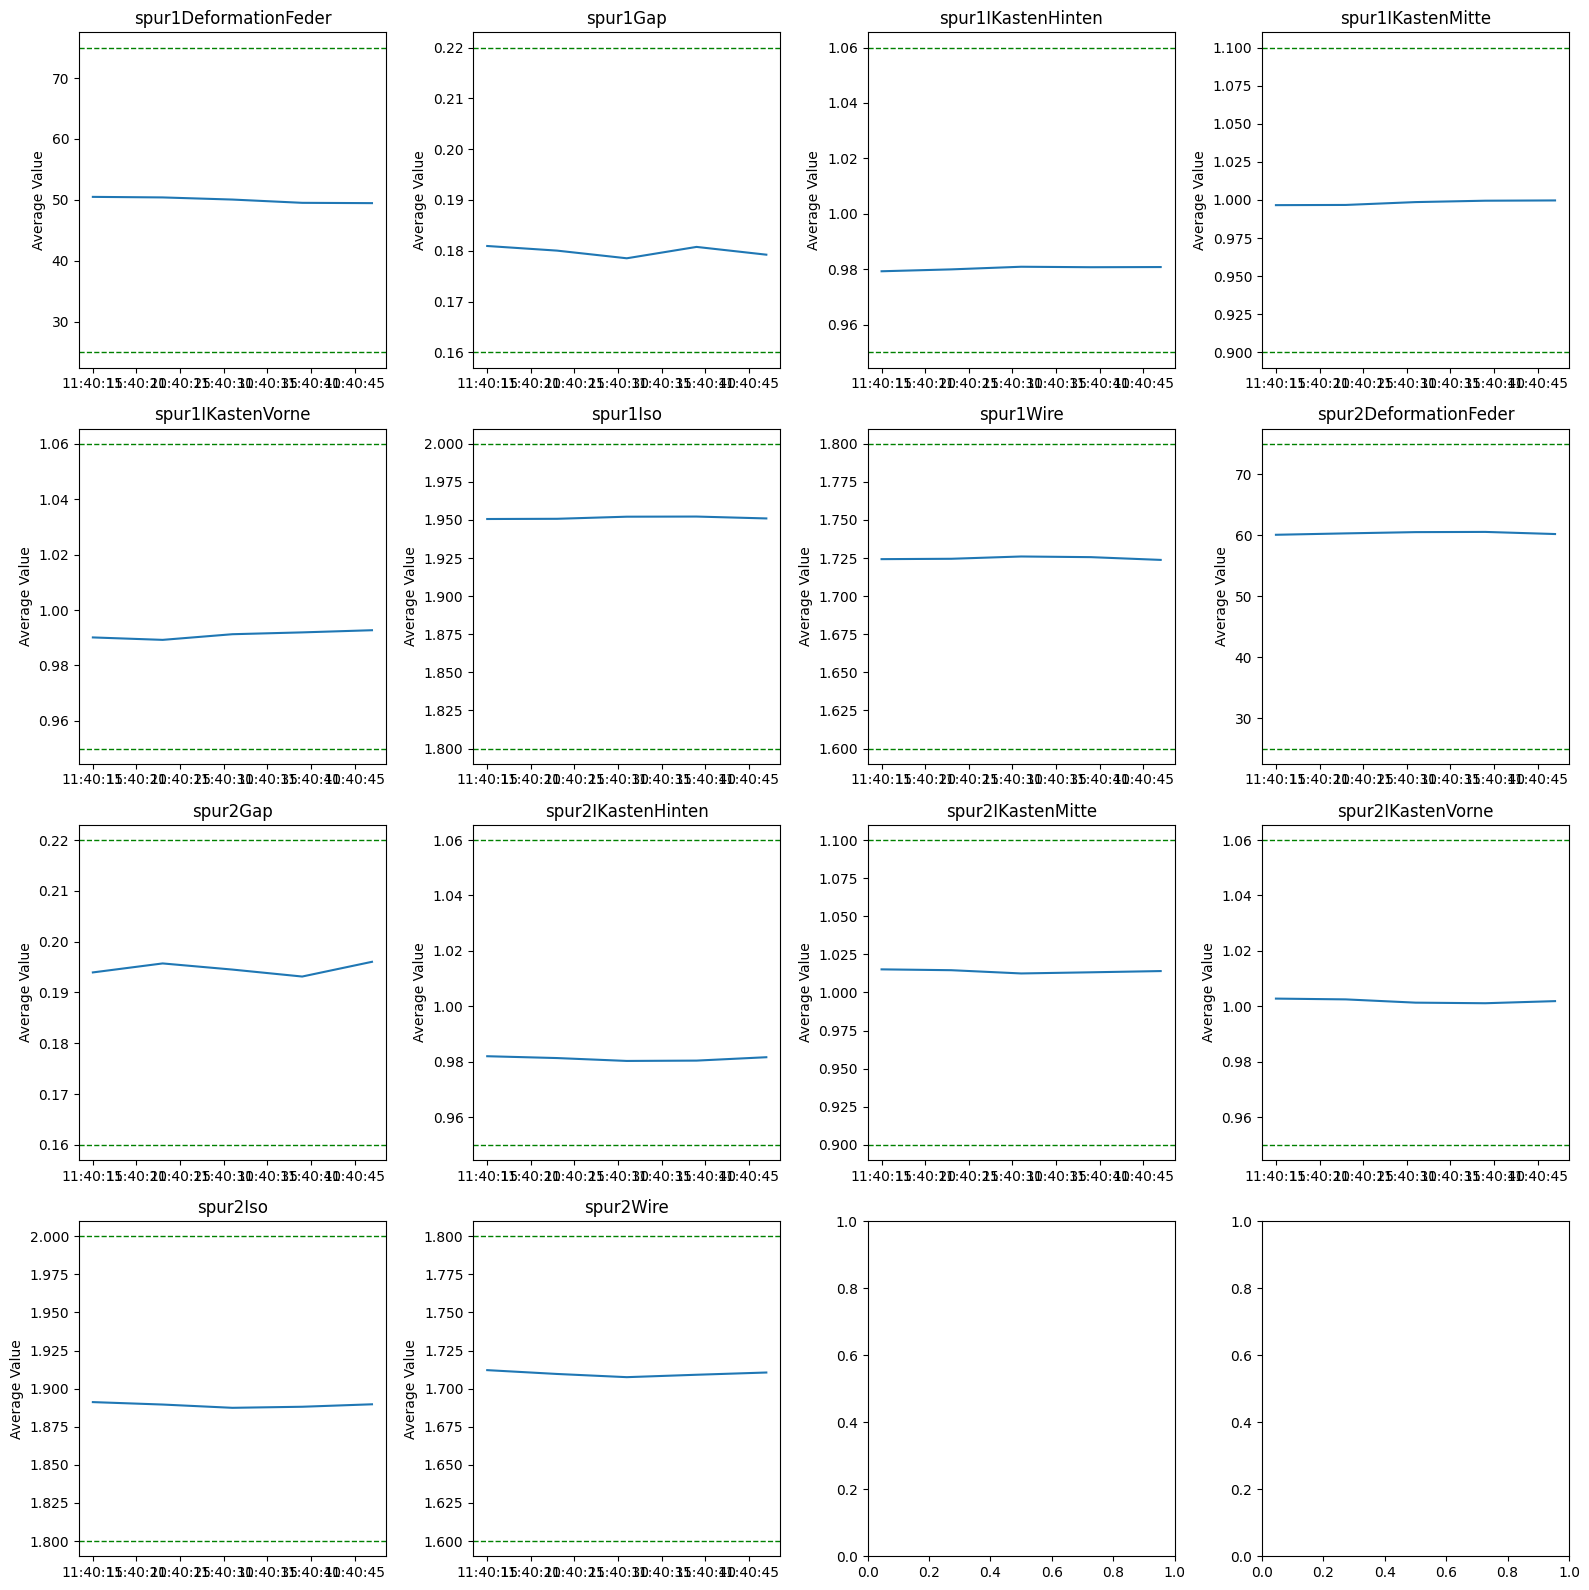

In [15]:
# Plots with upper and Lower Limits

# Total Variables
total_vars = sorted(small_d2.variable_name.unique().tolist())

n = len(total_vars)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for i, var in enumerate(total_vars):
    temp = small_d2[small_d2["variable_name"] == var]
    axes[i].plot(temp["timestamp"], temp["average_value"])
    axes[i].set_title(var)
    axes[i].set_ylabel("Average Value")
    lowerLimit = temp.lowerLimit.values[0]
    upperLimit = temp.upperLimit.values[0]
    nominalValue = temp.nominalValue.values[0]
    axes[i].axhline(y=lowerLimit + nominalValue, color='green', linestyle='--', linewidth=1)
    axes[i].axhline(y=upperLimit + nominalValue, color='green', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()
